### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# libraries for tuning hyperparameters
from sklearn.model_selection import GridSearchCV , KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [2]:
forest_fire = pd.read_csv("forestfires.csv")
forest_fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forest_fire.shape

(517, 31)

In [4]:
forest_fire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forest_fire[forest_fire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
# Dropping the duplicate rows
forest_fire1 = forest_fire.drop_duplicates()
forest_fire1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
forest_fire1.shape

(509, 31)

In [8]:
forest_fire2 = forest_fire1.drop(forest_fire1.columns[10:30], axis= 1)
forest_fire2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


In [9]:
forest_fire2.shape

(509, 11)

In [10]:
forest_fire2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  size_category  509 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 47.7+ KB


In [11]:
# Convert the categorical value(size_category) to integer 

label_encoder = preprocessing.LabelEncoder()
forest_fire2['size_category'] = label_encoder.fit_transform(forest_fire2['size_category'])

In [12]:
# Converting categorical value(Days and months) into integers 
forest_fire2.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
forest_fire2.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [13]:
forest_fire2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    int64  
 1   day            509 non-null    int64  
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  size_category  509 non-null    int32  
dtypes: float64(7), int32(1), int64(3)
memory usage: 45.7 KB


In [14]:
forest_fire2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


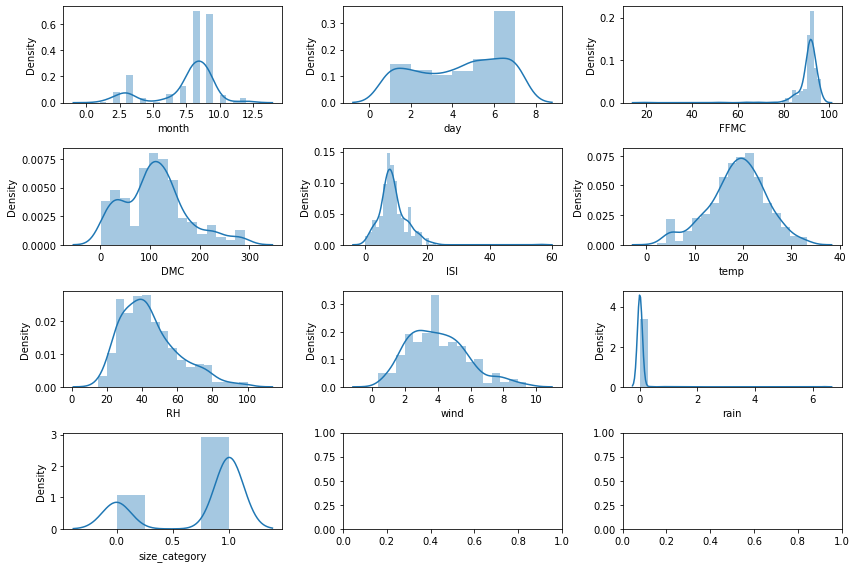

In [15]:
# Visualization

fig,ax =plt.subplots (4,3, figsize = (12,8))
sns.distplot(forest_fire2.month, ax = ax[0,0])
sns.distplot(forest_fire2.day, ax = ax[0,1])
sns.distplot(forest_fire2.FFMC, ax = ax[0,2])
sns.distplot(forest_fire2.DMC, ax = ax[1,0])
sns.distplot(forest_fire2.ISI, ax = ax[1,1])
sns.distplot(forest_fire2.temp, ax = ax[1,2])
sns.distplot(forest_fire2.RH, ax = ax[2,0])
sns.distplot(forest_fire2.wind, ax = ax[2,1])
sns.distplot(forest_fire2.rain, ax = ax[2,2])
sns.distplot(forest_fire2.size_category, ax = ax[3,0])

plt.tight_layout()
plt.show()

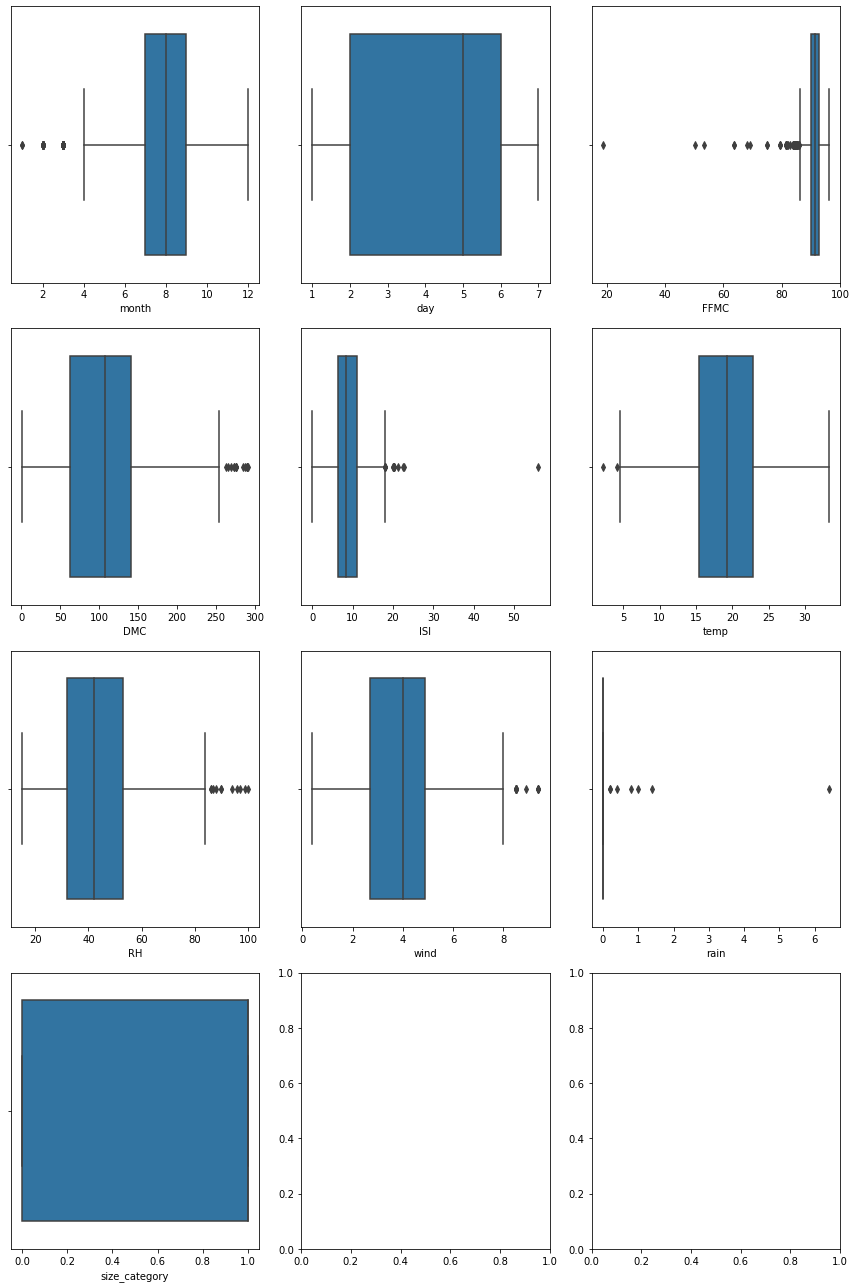

In [16]:
# Checking the outliers

fig,ax =plt.subplots (4,3, figsize = (12,18))
sns.boxplot(forest_fire2.month, ax = ax[0,0])
sns.boxplot(forest_fire2.day, ax = ax[0,1])
sns.boxplot(forest_fire2.FFMC, ax = ax[0,2])
sns.boxplot(forest_fire2.DMC, ax = ax[1,0])
sns.boxplot(forest_fire2.ISI, ax = ax[1,1])
sns.boxplot(forest_fire2.temp, ax = ax[1,2])
sns.boxplot(forest_fire2.RH, ax = ax[2,0])
sns.boxplot(forest_fire2.wind, ax = ax[2,1])
sns.boxplot(forest_fire2.rain, ax = ax[2,2])
sns.boxplot(forest_fire2.size_category, ax = ax[3,0])
plt.tight_layout()
plt.show()


In [17]:
# Standardizing the data

scale = MinMaxScaler()
forest_fire2 = pd.DataFrame(scale.fit_transform(forest_fire2))
forest_fire2

,0,1,2,3,4,5,6,7,8,9,10
0,0.181818,0.666667,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,1.0
1,0.818182,0.166667,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,1.0
2,0.818182,0.833333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,1.0
3,0.181818,0.666667,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,1.0
4,0.181818,1.000000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
504,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.0
505,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.0
506,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.0
507,0.636364,0.833333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,1.0


In [18]:
# Extracting the independant and dependant variables:
X = forest_fire2.iloc[:, 0:10].values
Y = forest_fire2.iloc[:,-1].values

In [19]:
X

array([[0.18181818, 0.66666667, 0.87096774, ..., 0.42352941, 0.7       ,
        0.        ],
       [0.81818182, 0.16666667, 0.92774194, ..., 0.21176471, 0.05555556,
        0.        ],
       [0.81818182, 0.83333333, 0.92774194, ..., 0.21176471, 0.1       ,
        0.        ],
       ...,
       [0.63636364, 1.        , 0.8116129 , ..., 0.64705882, 0.7       ,
        0.        ],
       [0.63636364, 0.83333333, 0.97677419, ..., 0.31764706, 0.4       ,
        0.        ],
       [0.90909091, 0.16666667, 0.78451613, ..., 0.18823529, 0.45555556,
        0.        ]])

In [20]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
#setting certain fix value of random seed for reproductibility
seed =7
np.random.seed(seed)

### Model Building

#### Create Model

In [22]:
model = Sequential()
model.add(Dense(12,input_dim = 10, kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(8, kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform',activation = 'linear'))

#### Compile

In [23]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

### Fit the Model

In [24]:
model.fit(X,Y, validation_split = 0.33, epochs = 100, batch_size = 10)

Epoch 1/100
35/35 [==============================] - 4s 16ms/step - loss: 0.7228 - accuracy: 0.2434 - val_loss: 0.6019 - val_accuracy: 0.3274
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6137 - accuracy: 0.2434 - val_loss: 0.4580 - val_accuracy: 0.3274
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.4026 - accuracy: 0.2463 - val_loss: 0.2666 - val_accuracy: 0.4048
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.2149 - accuracy: 0.6657 - val_loss: 0.2510 - val_accuracy: 0.6667
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1934 - accuracy: 0.7566 - val_loss: 0.2560 - val_accuracy: 0.6667
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1926 - accuracy: 0.7537 - val_loss: 0.2561 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1925 - accuracy: 0.7566 - val_loss: 0.2518 - val_accuracy: 0.6667
Epoch 8/100


Epoch 59/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1792 - accuracy: 0.7683 - val_loss: 0.2486 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1790 - accuracy: 0.7713 - val_loss: 0.2430 - val_accuracy: 0.6726
Epoch 61/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1796 - accuracy: 0.7713 - val_loss: 0.2417 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1824 - accuracy: 0.7713 - val_loss: 0.2430 - val_accuracy: 0.6726
Epoch 63/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1788 - accuracy: 0.7713 - val_loss: 0.2447 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.7713 - val_loss: 0.2463 - val_accuracy: 0.6726
Epoch 65/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1795 - accuracy: 0.7713 - val_loss: 0.2474 - val_accuracy: 0.6726
Epoch 

### Evaluate

In [25]:
scores = model.evaluate(X,Y)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.7387
accuracy: 73.87%


#### Getting History

In [26]:
history = model.fit(X,Y,validation_split = 0.33,epochs = 100, batch_size = 10)

Epoch 1/100
35/35 [==============================] - 0s 7ms/step - loss: 0.1761 - accuracy: 0.7713 - val_loss: 0.2552 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1756 - accuracy: 0.7713 - val_loss: 0.2496 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1767 - accuracy: 0.7713 - val_loss: 0.2522 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1760 - accuracy: 0.7771 - val_loss: 0.2547 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1755 - accuracy: 0.7713 - val_loss: 0.2537 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1756 - accuracy: 0.7801 - val_loss: 0.2532 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1754 - accuracy: 0.7713 - val_loss: 0.2512 - val_accuracy: 0.6726
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.7801 - val_loss: 0.2591 - val_accuracy: 0.6667
Epoch 60/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1757 - accuracy: 0.7771 - val_loss: 0.2570 - val_accuracy: 0.6667
Epoch 61/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1743 - accuracy: 0.7801 - val_loss: 0.2618 - val_accuracy: 0.6667
Epoch 62/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1746 - accuracy: 0.7771 - val_loss: 0.2632 - val_accuracy: 0.6667
Epoch 63/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1742 - accuracy: 0.7771 - val_loss: 0.2600 - val_accuracy: 0.6667
Epoch 64/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.7771 - val_loss: 0.2625 - val_accuracy: 0.6667
Epoch 65/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1749 - accuracy: 0.7801 - val_loss: 0.2587 - val_accuracy: 0.6667
Epoch 

In [27]:
#list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

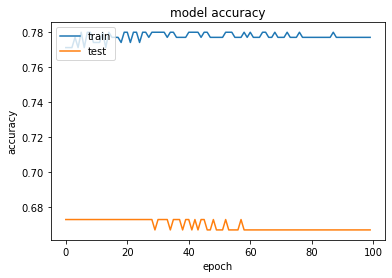

In [28]:
# Visualizing the history -- for accuracy and loss

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


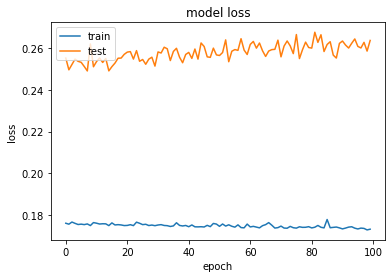

In [29]:

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

####  Tuning of Hyperparameters - Batch size and Epochs

#### Create The Model

In [30]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
    
    adam =Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model, verbose = 0)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size, epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose =10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   2.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.765 total time=   1.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.510 total time=   1.7s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.676 total time=   1.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.693 total time=   1.7s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [ ]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{}, {} with :{}'. format(mean, stdev, param))